In [ ]:
#default_exp utils

## Import modules that are only used in documentation, nbdev related stuff like testing using assert and more generally inside this notebook (not going to src).

In [ ]:
#hide
from nbdev.showdoc import *

%load_ext autoreload
%autoreload 2 #autoreload to make code from other modules get updated online inside notebook

import sys
sys.path.append('..') #appends project root to path in order to import project packages since `noteboks_dev` is not on the root

#DO NOT EDIT

In [ ]:
#hide

#Internal Imports
#imports that are going to be used only during development and are not intended to be loaded inside the generated modules.
#for example: use imported modules to generate graphs for documentation, but lib is unused in actual package

#import ...

# Code

In [2]:
#export
import numpy as np
from scipy import stats

In [36]:
def get_distribution_var_factor_jaccard(jac_dist, min_var_factor = 1e-2, alpha = 1):
    '''
    gets the variance factor of the "point distribution" given a jaccard distance from
    the query point
    
    to get the actual variance, use the variance factor alongside the variance of the
    observed variable in the neighbor points.
    
    example:
    
    get the 30 nearest neighbors, calculat their variance along some axis,
    then calculate the variance factor of each point and then multiply to get the
    "point variance in the contribution" for each point
    
    functions to test:
    tangent, 1/x, min_var - log(1-x)
    '''    
    assert min_var_factor > 0
    assert alpha > 0
    var_factor = min_var_factor - alpha*np.log(1-jac_dist)
    return var_factor

def pointwise_variance(values, distances, min_var_factor = 1e-2, alpha = 1):
    '''
    gets the pointwise variance for each neighbor of a given point, considering
    the variance of the neighborhood and the variance factor of each point 
    
    each point contributes to the estimation of the queried point, but this contribution
    has a variance associated with how much this point is alike the queried point. in this sense
    pointwise variance is defined, as the variance of the contribution of each point, given the 
    variance of all the points and how similar the points in the neighborhood are to the queried point
    '''
    var = values.var(axis = -1)
    var_factor = get_distribution_var_factor_jaccard(distances, min_var_factor)
    pointwise_variance = var*var_factor
    return pointwise_variance

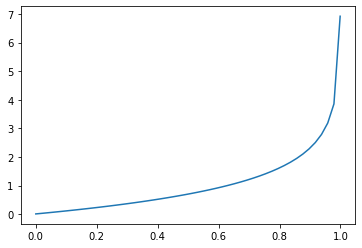

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
jac_dists = np.linspace(0,0.999, 50)
plt.plot(jac_dists, get_distribution_var_factor_jaccard(jac_dists, alpha = 1))

# Export -

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()